In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=50

In [3]:
car_data=pd.read_csv('/kaggle/input/carvana/training_car.csv')

In [4]:
car_data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [5]:
car_data.shape

(72983, 34)

In [6]:
car_data.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [7]:
car_data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [8]:
#drop refid, vehyear, wheeltypeid, topthree, vnzip, aucguard, primeunit, purchasedate

In [9]:
car_data['Auction'].unique() #one hot gde mozemo da jedan izbacimo jer ih ima tri

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

In [10]:
car_data.IsBadBuy.value_counts(normalize=True)

0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64

In [11]:
car_data[(car_data.VehYear+car_data.VehicleAge!=2009) & (car_data.VehYear+car_data.VehicleAge!=2010)] #mozemo da izbacimo godinu proizvodnje

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost


In [12]:
car_data.Make.value_counts() #one hot, sa ogranicenjima

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
CADILLAC           33
ACURA              33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

In [13]:
car_data.Model.value_counts() #verovatno drop

PT CRUISER              2329
IMPALA                  1990
TAURUS                  1425
CALIBER                 1375
CARAVAN GRAND FWD V6    1289
                        ... 
ESCAPE                     1
PRIZM 1.8L I-4 SFI D       1
CAMRY V6 3.0L / 3.3L       1
LHS                        1
PATRIOT 2WD 4C 2.0L        1
Name: Model, Length: 1063, dtype: int64

In [14]:
car_data.SubModel.str.contains('4D').sum() #true ako su 4 vrata, false ako nisu

59830

In [15]:
car_data.Trim.value_counts() #one hot sa ogranicenjima

Bas    13950
LS     10174
SE      9348
SXT     3825
LT      3540
       ...  
Har        1
LL         1
JLX        1
JLS        1
L 3        1
Name: Trim, Length: 134, dtype: int64

In [16]:
car_data.Color.value_counts() #silver, white, black, other

SILVER       14875
WHITE        12123
BLUE         10347
GREY          7887
BLACK         7627
RED           6257
GOLD          5231
GREEN         3194
MAROON        2046
BEIGE         1584
BROWN          436
ORANGE         415
PURPLE         373
YELLOW         244
OTHER          242
NOT AVAIL       94
Name: Color, dtype: int64

In [17]:
car_data.Transmission.value_counts() #one hot

AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64

In [18]:
car_data.WheelType.value_counts() #izbaci wheeltypeid, one hot

Alloy      36050
Covers     33004
Special      755
Name: WheelType, dtype: int64

In [19]:
car_data.Nationality.value_counts() #one hot, spoji aziju

AMERICAN          61028
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

In [20]:
car_data.Size.value_counts() #kateogorizuj prema velicini

MEDIUM         30785
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
Name: Size, dtype: int64

In [21]:
car_data.TopThreeAmericanName.value_counts() #vrlo verovatno izbaciti

GM          25314
CHRYSLER    23399
FORD        12315
OTHER       11950
Name: TopThreeAmericanName, dtype: int64

In [22]:
car_data.PRIMEUNIT.value_counts() #izbaci, malo postojecih vrednosti

NO     3357
YES      62
Name: PRIMEUNIT, dtype: int64

In [23]:
car_data.AUCGUART.value_counts() #takodje izbaciti

GREEN    3340
RED        79
Name: AUCGUART, dtype: int64

In [24]:
car_data.BYRNO.value_counts().head(20) #razmislicemo jos

99761    3943
18880    3588
835      2987
3453     2927
22916    2852
21053    2816
19619    2738
99750    2653
17675    2617
20928    2586
21973    2548
17212    2517
20740    2414
5546     2211
18111    2115
18822    2102
23359    2076
8655     2072
20234    2063
20833    1998
Name: BYRNO, dtype: int64

In [25]:
car_data.VNST.value_counts() #takodje one hot neki

TX    13596
FL    10447
CA     7095
NC     7042
AZ     6174
CO     4998
SC     4280
OK     3594
GA     2450
TN     1764
VA     1662
MD     1158
UT      875
PA      847
OH      795
MO      758
AL      690
NV      562
IA      499
MS      493
IN      486
IL      458
LA      349
NJ      317
WV      292
NM      239
KY      230
OR      211
ID      196
WA      136
NH       97
AR       70
MN       62
NE       26
MA       15
MI       14
NY        6
Name: VNST, dtype: int64

In [26]:
car_data.VNZIP1.value_counts() #dropuj

32824    3699
27542    3402
75236    2431
74135    2321
80022    2118
         ... 
76101       1
85248       1
85260       1
80112       1
25071       1
Name: VNZIP1, Length: 153, dtype: int64

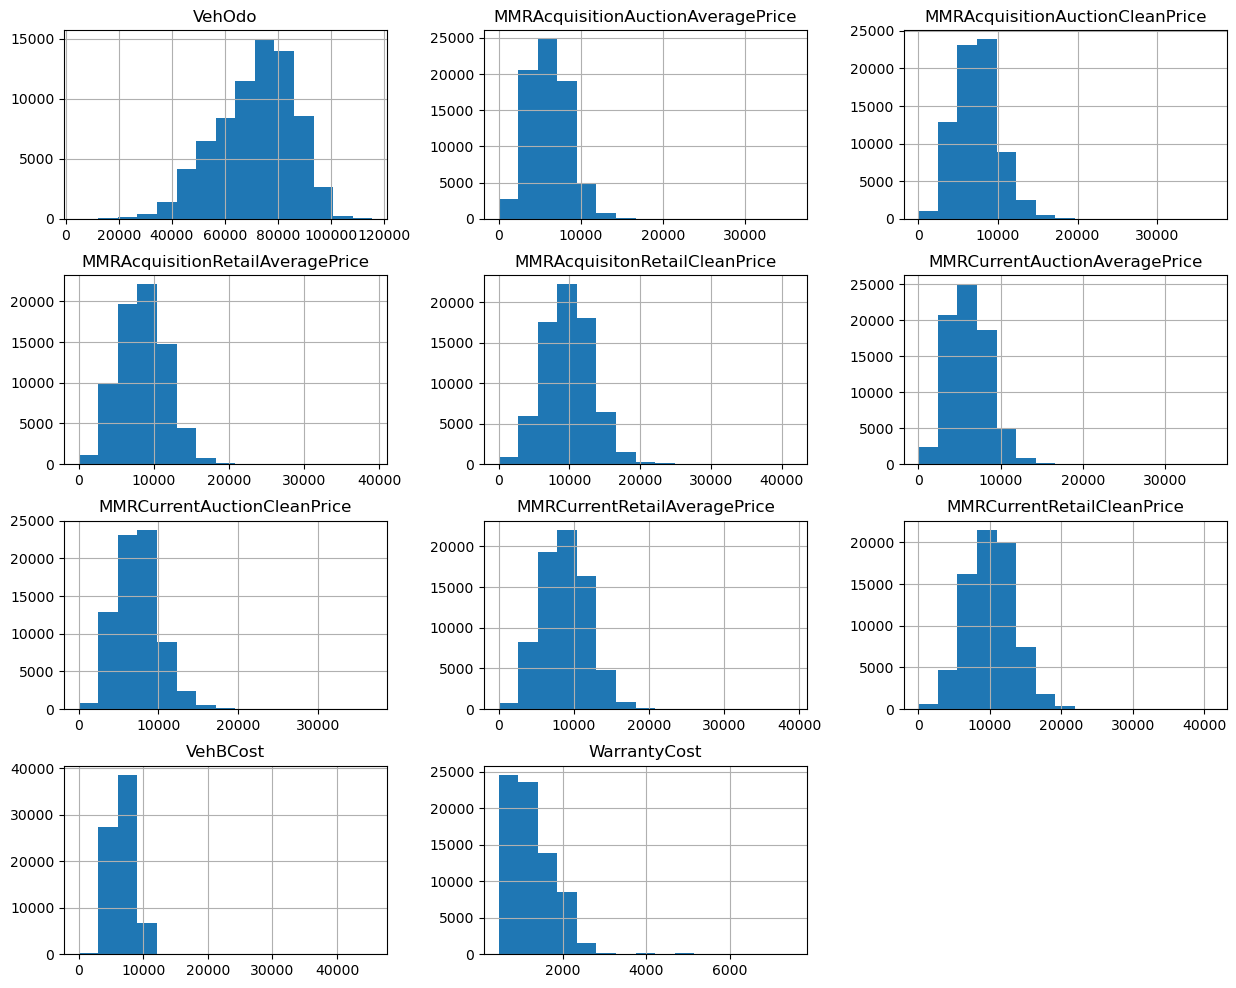

In [27]:
car_data[['VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
          'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']].hist(bins=15, figsize=(15,12))
plt.show()

<Axes: >

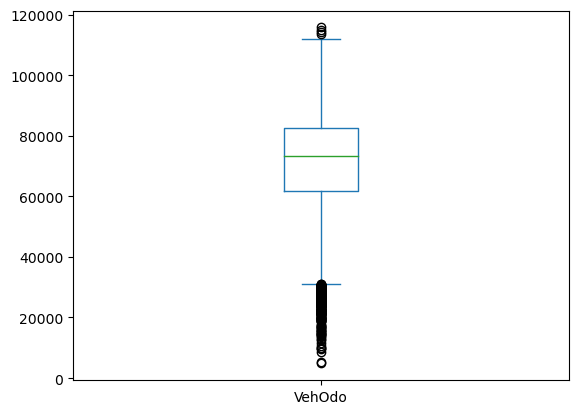

In [28]:
car_data[['VehOdo']].plot(kind='box')

<Axes: >

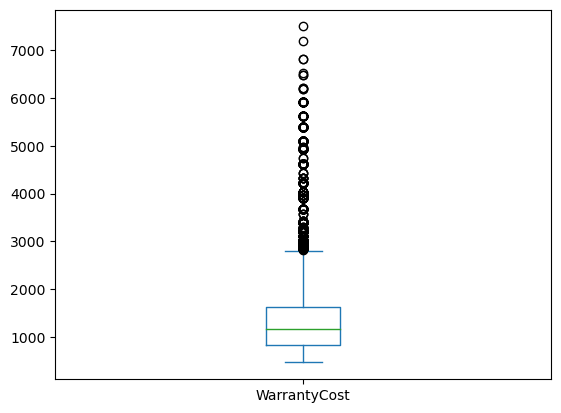

In [29]:
car_data[['WarrantyCost']].plot(kind='box')

<Axes: >

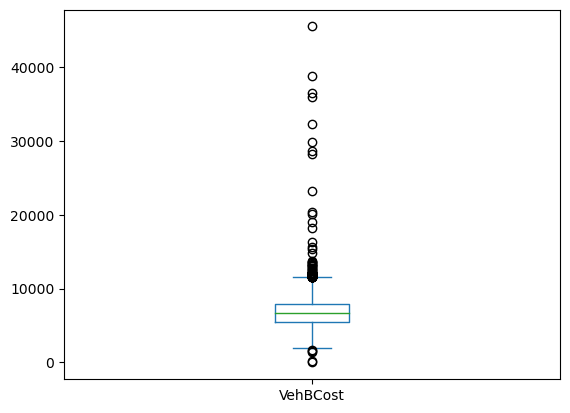

In [30]:
car_data[['VehBCost']].plot(kind='box')

In [31]:
car_data[car_data['MMRAcquisitionAuctionCleanPrice']==0]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
431,432,1,8/19/2009,ADESA,2007,2,CHEVROLET,UPLANDER FWD V6 3.9L,LS,PASSENGER EXT 3.5L,GREY,AUTO,1.0,Alloy,81858,AMERICAN,VAN,GM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,17675,20166,VA,6985.0,0,2282
523,524,0,9/30/2009,ADESA,2007,2,CHEVROLET,UPLANDER FWD V6 3.9L,LS,PASSENGER EXT 3.5L,SILVER,AUTO,2.0,Covers,87459,AMERICAN,VAN,GM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5546,20166,VA,6745.0,0,2282
820,822,0,7/28/2009,ADESA,2005,4,CHRYSLER,PACIFICA FWD 3.8L V6,Bas,4D SPORT,GREEN,AUTO,2.0,Covers,69424,AMERICAN,CROSSOVER,CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,22916,50111,IA,7315.0,0,1215
1092,1094,0,11/23/2010,ADESA,2004,6,DODGE,DAKOTA PICKUP 2WD V8,Spo,QUAD CAB 4.7L SPORT,SILVER,AUTO,1.0,Alloy,93415,AMERICAN,SMALL TRUCK,CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,GREEN,8655,72117,AR,7205.0,0,1774
1098,1100,0,11/23/2010,ADESA,2004,6,OLDSMOBILE,ALERO V6,GLS,2D COUPE GLS,RED,AUTO,1.0,Alloy,85930,AMERICAN,MEDIUM,GM,0.0,0.0,0.0,0.0,2925.0,4042.0,5800.0,6945.0,NaN,NaN,8655,72117,AR,4130.0,0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71913,71945,0,6/25/2009,ADESA,2004,5,FORD,F150 PICKUP 2WD V8 4,XL,REG CAB 4.6L STX,BLACK,AUTO,1.0,Alloy,65042,AMERICAN,LARGE TRUCK,FORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3453,80817,CO,6390.0,0,728
72166,72198,0,6/24/2010,ADESA,2005,5,FORD,TAURUS,SEL,4D SEDAN SE COMFORT DURATEC,GOLD,AUTO,1.0,Alloy,89646,AMERICAN,MEDIUM,FORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,18822,78227,TX,5215.0,0,983
72698,72730,0,7/1/2009,ADESA,2002,7,JEEP,GRAND CHEROKEE 2WD V,Lim,4D WAGON,GREY,AUTO,1.0,Alloy,86906,AMERICAN,MEDIUM SUV,CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,18881,30212,GA,5900.0,0,2322
72774,72806,0,8/19/2009,ADESA,2005,4,CHRYSLER,PACIFICA FWD 3.8L V6,Bas,4D SPORT,BLUE,AUTO,2.0,Covers,82412,AMERICAN,CROSSOVER,CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,18111,30212,GA,7200.0,0,1503


In [32]:
car_data.iloc[:,19:26]

,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0
1,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0
2,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0
3,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0
4,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0
...,...,...,...,...,...,...,...
72978,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0
72979,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0
72980,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0
72981,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0


In [33]:
# sns.heatmap(car_data.iloc[:,19:26], annot=True)
car_data.iloc[:,18:26].corr('pearson')
#visoka korelacija, uzecemo jedan od ovih

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042
MMRAcquisitionAuctionCleanPrice,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203
MMRAcquisitionRetailAveragePrice,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054
MMRAcquisitonRetailCleanPrice,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810
MMRCurrentAuctionAveragePrice,0.937817,0.923610,0.851647,0.846914,1.000000,0.990329,0.915073,0.912231
MMRCurrentAuctionCleanPrice,0.932492,0.932114,0.849407,0.855689,0.990329,1.000000,0.908669,0.921536
MMRCurrentRetailAveragePrice,0.871755,0.860716,0.913108,0.903188,0.915073,0.908669,1.000000,0.989760
MMRCurrentRetailCleanPrice,0.871042,0.871203,0.906054,0.906810,0.912231,0.921536,0.989760,1.000000


In [34]:
 car_data=car_data.drop(['MMRAcquisitionAuctionCleanPrice','MMRAcquisitonRetailCleanPrice',
                         'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice',
                         'MMRCurrentRetailCleanPrice','MMRAcquisitionRetailAveragePrice','RefId','VehYear','WheelTypeID'
                         ,'TopThreeAmericanName', 'VNZIP1', 'AUCGUART', 'PurchDate', 'PRIMEUNIT', 'Model'], axis=1)

In [35]:
car_data

,IsBadBuy,Auction,VehicleAge,Make,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,i,4D SEDAN I,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,8155.0,21973,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,6854.0,19638,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,SXT,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,3202.0,19638,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,SXT,4D SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,1893.0,19638,FL,4100.0,0,630
4,0,ADESA,4,FORD,ZX3,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,3913.0,19638,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,GS,4D SEDAN GS,BLACK,AUTO,Alloy,45234,AMERICAN,MEDIUM,1996.0,18111,GA,4200.0,0,993
72979,0,ADESA,2,CHEVROLET,LS,4D SEDAN LS,SILVER,AUTO,NaN,71759,AMERICAN,MEDIUM,6418.0,18881,GA,6200.0,0,1038
72980,0,ADESA,4,JEEP,Lar,4D WAGON LAREDO,SILVER,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,8545.0,18111,GA,8200.0,0,1893
72981,0,ADESA,3,CHEVROLET,LS,4D SEDAN LS,WHITE,AUTO,Alloy,79554,AMERICAN,LARGE,6420.0,18881,GA,7000.0,0,1974


In [36]:
#resi nepostojece vrednosti